<a href="https://colab.research.google.com/github/BrunoChester/data-manipulation/blob/master/Healthy_food_patterns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*I'm getting my data [World Food Facts](https://www.kaggle.com/openfoodfacts/world-food-facts), an open dataset on Kaggle, which features nutrional information from foods internationally.* 

I'll be trying to explore the World Food Facts dataset to determine how the US compares to other countries with regards to heathly food patterns (in particular focusing on sugar and addatives).

In [ ]:
import sqlite3
con = sqlite3.connect("database.sqlite")
foods = pd.read_sql_query("SELECT * from FoodFacts", con)

In [ ]:
foods.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,caffeine_100g,taurine_100g,ph_100g,fruits_vegetables_nuts_100g,collagen_meat_protein_ratio_100g,cocoa_100g,chlorophyl_100g,carbon_footprint_100g,nutrition_score_fr_100g,nutrition_score_uk_100g
0,000000000000012866,http://world-en.openfoodfacts.org/product/0000...,date-limite-app,1447004364,2015-11-08T17:39:24Z,1447004364,2015-11-08T17:39:24Z,Poêlée à la sarladaise,,,...,,,,,,,,,,
1,0000000024600,http://world-en.openfoodfacts.org/product/0000...,date-limite-app,1434530704,2015-06-17T08:45:04Z,1434535914,2015-06-17T10:11:54Z,Filet de bœuf,,2.46 kg,...,,,,,,,,,,
2,0000000036252,http://world-en.openfoodfacts.org/product/0000...,tacinte,1422221701,2015-01-25T21:35:01Z,1422221855,2015-01-25T21:37:35Z,Lion Peanut x2,,,...,,,,,,,,,,
3,0000000039259,http://world-en.openfoodfacts.org/product/0000...,tacinte,1422221773,2015-01-25T21:36:13Z,1422221926,2015-01-25T21:38:46Z,Twix x2,,,...,,,,,,,,,,
4,0000000039529,http://world-en.openfoodfacts.org/product/0000...,teolemon,1420147051,2015-01-01T21:17:31Z,1439141740,2015-08-09T17:35:40Z,Pack de 2 Twix,,,...,,,,,,,,,,


*Open food data is somewhat dirty. Some of the entries have quantitative nutritional data columns populated, while some do not. I'll only work with rows that contain full caloric, sugar, fat, protein, and sodium information.*

In [ ]:
quant_foods = foods[(foods.energy_100g != '') & (foods.sugars_100g != '')& (foods.fat_100g != '')
      & (foods.proteins_100g != '')& (foods.sodium_100g != '')][['product_name','countries','main_category','energy_100g',
                                                                 'sugars_100g','fat_100g', 'proteins_100g',
                                                                 'sodium_100g','carbon_footprint_100g']]

**What percent of global products include quantitative nutritional information**

In [ ]:
"{0:0f}% percent of the food dataset has complete nutritional product information".format(100*quant_foods.product_name.count()/foods.product_name.count())

'48.409996% percent of the food dataset has complete nutritional product information'

*As we've seen earlier, some of the country tags are inconsistent. We'll use the top 10 countries as categories and group the rest into one bucket for the sake of our analysis*

In [ ]:
top_ten = ['France','España','Deutschland','United Kingdom',
           'United States','Belgique','Australia','Suisse','Portugal','Italia']

In [ ]:
def purify_countries(row):
    if row[['countries']].any() in top_ten:
        return row['countries']
        
    else:
        return 'Other'

In [ ]:
quant_foods['clean_countries'] = quant_foods.apply(purify_countries, axis=1)
ordered_countries = quant_foods['clean_countries'].value_counts().index

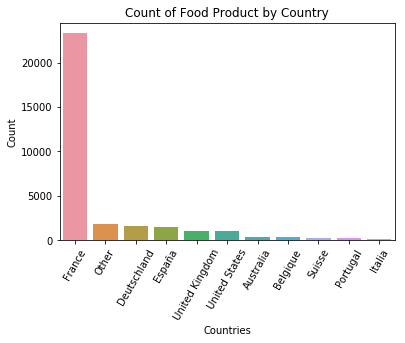

In [ ]:
p = sns.countplot(x='clean_countries', data=quant_foods, order=ordered_countries)
p.set_xticklabels(p.get_xticklabels(), rotation=60)
p.set(xlabel='Countries', ylabel='Count')
plt.title('Count of Food Product by Country');

*Our dataset predominantly consists of French products*

**What kind of food categories does our dataset consist of?**

In [ ]:
categories=['en:sugary-snacks','en:dairies','en:fresh-foods','en:beverages'                                
'en:groceries','en:meats','en:meals','en:salty-snacks','en:frozen-foods','en:canned-foods','en:fruit-juices'                               
'en:desserts','en:breakfasts','en:sandwiches','en:seafood','en:spreads','en:baby-foods','en:dried-products']                             

In [ ]:
def purify_categories(row):
    if row[['main_category']].any() in categories:
        return row['main_category'][3:]
    elif row['main_category'] == 'en:plant-based-foods-and-beverages':
        return 'plant-food-n-bev'
    elif row['main_category'] == '':
        return 'blank'
    else:
        return 'other'

In [ ]:
quant_foods['category'] = quant_foods.apply(purify_categories, axis=1)

In [ ]:
ordered_categories = quant_foods['category'].value_counts().index

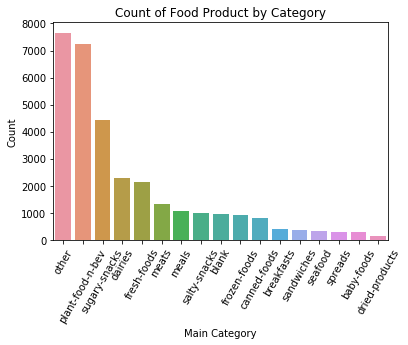

In [ ]:
p = sns.countplot(x='category', data=quant_foods, order=ordered_categories)
p.set_xticklabels(p.get_xticklabels(), rotation=60)
p.set(xlabel='Main Category', ylabel='Count')
plt.title('Count of Food Product by Category');

*The dataset is predominantly composed of plant-based-food-and-beverages, sugary snacks, and dairies*

**Does the stereotype that the US has the most sugary food and France the least hold up?**

In [ ]:
quant_foods.head()

,product_name,countries,main_category,energy_100g,sugars_100g,fat_100g,proteins_100g,sodium_100g,carbon_footprint_100g,clean_countries,category
10,Luxury Christmas Pudding,Royaume-Uni,en:desserts,1284,44,7,3.9,0.0787402,,Other,other
11,Luxury Christmas Pudding,United Kingdom,en:sugary-snacks,1284,44,7,3.9,0.0787,,United Kingdom,sugary-snacks
13,"Pepsi, Nouveau goût !",France,en:beverages,177,10.4,0,0,0.01,,France,other
14,Cauliflower,United Kingdom,en:plant-based-foods-and-beverages,144,2.5,0.9,3.6,0,,United Kingdom,plant-food-n-bev
16,7Up,France,en:beverages,177,10.4,0,0,0.0393701,,France,other


In [ ]:
quant_foods['sugars_100g'] = quant_foods['sugars_100g'].astype(float)

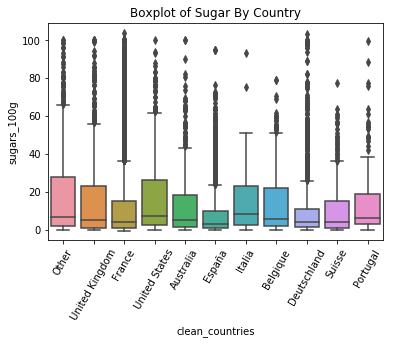

In [ ]:
p = sns.boxplot(x='clean_countries', y='sugars_100g', data=quant_foods)
p.set_xticklabels(p.get_xticklabels(), rotation=60)
plt.title('Boxplot of Sugar By Country');

*It looks like the US does have more sugary food; however, Italy comes very close. Although France has less sugar, Germany seems to perform better on this metric*

**Let's see if we can fit a poisson distribution. The number of additives in given product in our dataset follows a Poisson distribution because it is a discrete probablity distribution, which fits our story. A poisson describes the number of events in a given time/space, which is a great fit for thinking how many additives are in a product**

In [ ]:
usa_a = foods[(foods.additives_n!='') & (foods.countries == 'United States')]['additives_n']
fr_a = foods[(foods.additives_n!='') & (foods.countries == 'France')]['additives_n']

/Users/dasha/anaconda3/envs/lyft/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


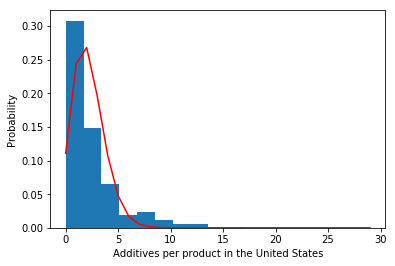

In [ ]:
p_model = stats.poisson(usa_a.mean())
x = range(30)
#we're going to model the hypothetical poission with a lambda that conforms to the mean that we see in our dataset
poisson_y = p_model.pmf(x)
plt.hist(list(usa_a), bins=10, normed=True)
#now we're actually going to overlay the model over the data to see whether our expection that this could be a
#a poisson has a basis
plot(x, poisson_y,'r')
ylabel('Probability')
xlabel('Additives per product in the United States');

/Users/dasha/anaconda3/envs/lyft/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


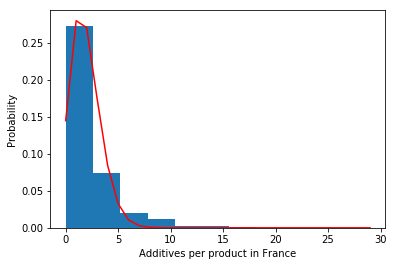

In [ ]:
p_model = stats.poisson(fr_a.mean())
x = range(30)
#we're going to model the hypothetical poission with a lambda that conforms to the mean that we see in our dataset
poisson_y = p_model.pmf(x)
plt.hist(list(fr_a), bins=10, normed=True)
#now we're actually going to overlay the model over the data to see whether our expection that this could be a
#a poisson has a basis
plot(x, poisson_y,'r')
ylabel('Probability')
xlabel('Additives per product in France');

/Users/dasha/anaconda3/envs/lyft/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/dasha/anaconda3/envs/lyft/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


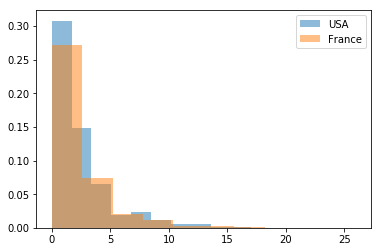

In [ ]:
pyplot.hist(list(usa_a), alpha=0.5, label='USA', normed=True)
pyplot.hist(list(fr_a),  alpha=0.5, label='France', normed=True)
pyplot.legend(loc='upper right')
pyplot.show()

**Earlier we asked ourselves if US and France have different sugar levels on average. We now have the tools to test this with a formal hypothesis test rather than just examining boxplots** 

$H_0: \mu_F = \mu_A$  

$H_a: \mu_F \neq \mu_A$

alpha = .05

*In comparing these two averages, we want to first check the size of our samples, since this will define whether we are free to use a z-test*

In [ ]:
#split up the dataset
France = quant_foods[quant_foods.clean_countries=='France']['sugars_100g']
America = quant_foods[quant_foods.clean_countries=='United States']['sugars_100g']

In [ ]:
print(len(France), len(America))

23295 1021


*With samples this large, we can feel comfortable that we have enough data to compare the means using the z-test*

In [ ]:
m1, m2 = America.mean(), France.mean()
s1, s2 = America.std(), France.std()
n1, n2 = len(America), len(France)

In [ ]:
diff = m1 - m2
upper_int = diff + 1.96 * np.sqrt ( ( ( s1 **2 )/n1 + (s2 ** 2)/n2 ) )
lower_int = diff - 1.96 * np.sqrt ( ( ( s1 **2 )/n1 + (s2 ** 2)/n2 )  )

print (lower_int)
print (upper_int)

2.8265154743328136
5.307175867308134


>We are 95% confident that the difference in average sugar content between France and the United States falls between 2 and 5. Because this confidence interval doesn't include 0, we reject the null and conclude that we have enough evidence to suggest that it would be highly unlikely that we would see this sample difference if the two population averages were the same 

Much like we did the above with sugar, we can test if there is a significant difference in the number of additives between France and the United States. We will use the same alpha and set up the same hypthosis test

In [ ]:
print(len(fr_a), len(usa_a))

31491 995


In [ ]:
m1, m2 = usa_a.mean(), fr_a.mean()
s1, s2 = usa_a.std(), fr_a.std()
n1, n2 = len(usa_a), len(fr_a)

In [ ]:
diff = m1 - m2
upper_int = diff + 1.96 * np.sqrt ( ( ( s1 **2 )/n1 + (s2 ** 2)/n2 ) )
lower_int = diff - 1.96 * np.sqrt ( ( ( s1 **2 )/n1 + (s2 ** 2)/n2 )  )

print (lower_int)
print (upper_int)

0.09239428847575112
0.44154874286653745


> Similarily to our sugar test, we can reject the null at our signifiance level as zero doesn't fall into our confidence interval. It does appear that there is likely to be a difference in additives between the US and France.